In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bnb = pd.read_csv("airbnb_new.csv")

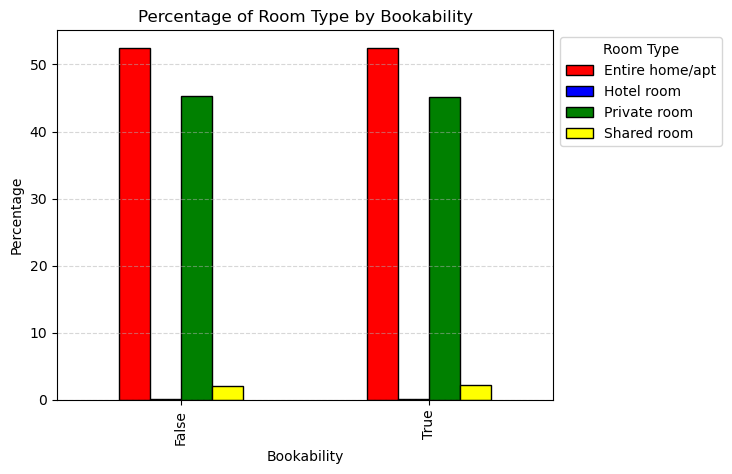

In [3]:
Bookable = pd.crosstab(bnb['bookable'], bnb['room type'])
Room_type = Bookable.sum(axis=1)

# Divide to get percentage value
bookable_pcts = Bookable.div(Room_type, axis=0)

# Change it to percentage
bookable_pcts_percent = bookable_pcts * 100

colors = ['red', 'blue', 'green', 'yellow']  

# Create a stacked bar plot of the normalized data
ax = bookable_pcts_percent.plot.bar(color=colors, edgecolor='black')

# Set plot labels and title
plt.xlabel('Bookability')
plt.ylabel('Percentage')
plt.title('Percentage of Room Type by Bookability')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add a legend
room_type_legend = list(bookable_pcts_percent.columns)  # Get the room type labels
ax.legend(room_type_legend, title='Room Type', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

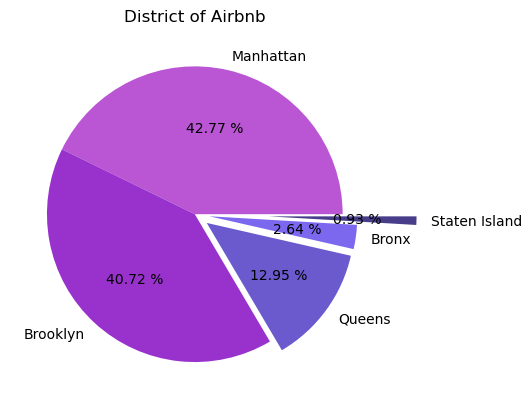

In [4]:
Manhattan = bnb.loc[bnb['district'] == 'Manhattan'].count()[0]
Brooklyn = bnb.loc[bnb['district'] == 'Brooklyn'].count()[0]
Queens = bnb.loc[bnb['district'] == 'Queens'].count()[0]
Bronx = bnb.loc[bnb['district'] == 'Bronx'].count()[0]
Staten_Island = bnb.loc[bnb['district'] == 'Staten Island'].count()[0]

labels = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
colors = ['#BA55D3', '#9932CC', '#6A5ACD', '#7B68EE', '#483D8B']
explode = (0,0,0.1,0.1,0.5)

plt.title('District of Airbnb')

plt.pie([Manhattan,Brooklyn,Queens,Bronx,Staten_Island], labels=labels, colors=colors, autopct='%.2f %%', explode=explode)

plt.show()

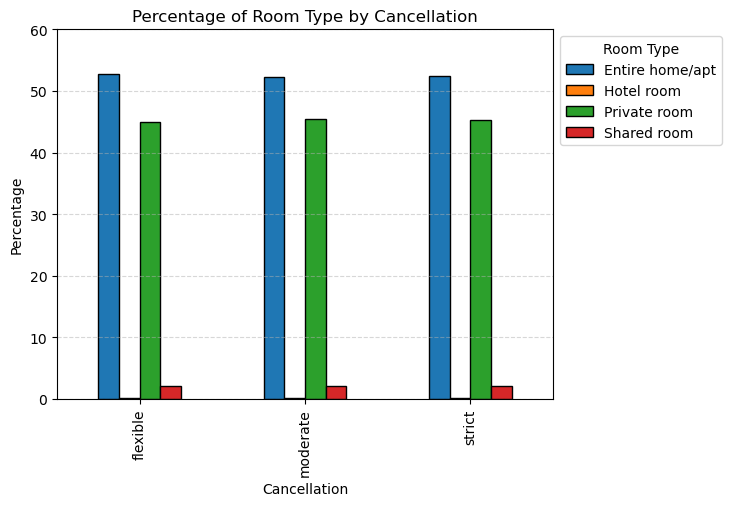

In [17]:
Cancellation = pd.crosstab(bnb['cancellation'], bnb['room type'])
Room_type = Cancellation.sum(axis=1)

bins = [0,10,20,30,40,50,60]

# Divide to get percentage value
cancel_pcts = Cancellation.div(Room_type, axis=0)

# Change it to percentage
cancel_pcts_percent = cancel_pcts * 100  

# Create a stacked bar plot of the normalized data
ax2 = cancel_pcts_percent.plot.bar(edgecolor='black')

# Set plot labels and title
plt.xlabel('Cancellation')
plt.ylabel('Percentage')
plt.yticks(bins)
plt.title('Percentage of Room Type by Cancellation')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add a legend
room_type_legend = list(cancel_pcts_percent.columns)  # Get the room type labels
ax2.legend(room_type_legend, title='Room Type', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

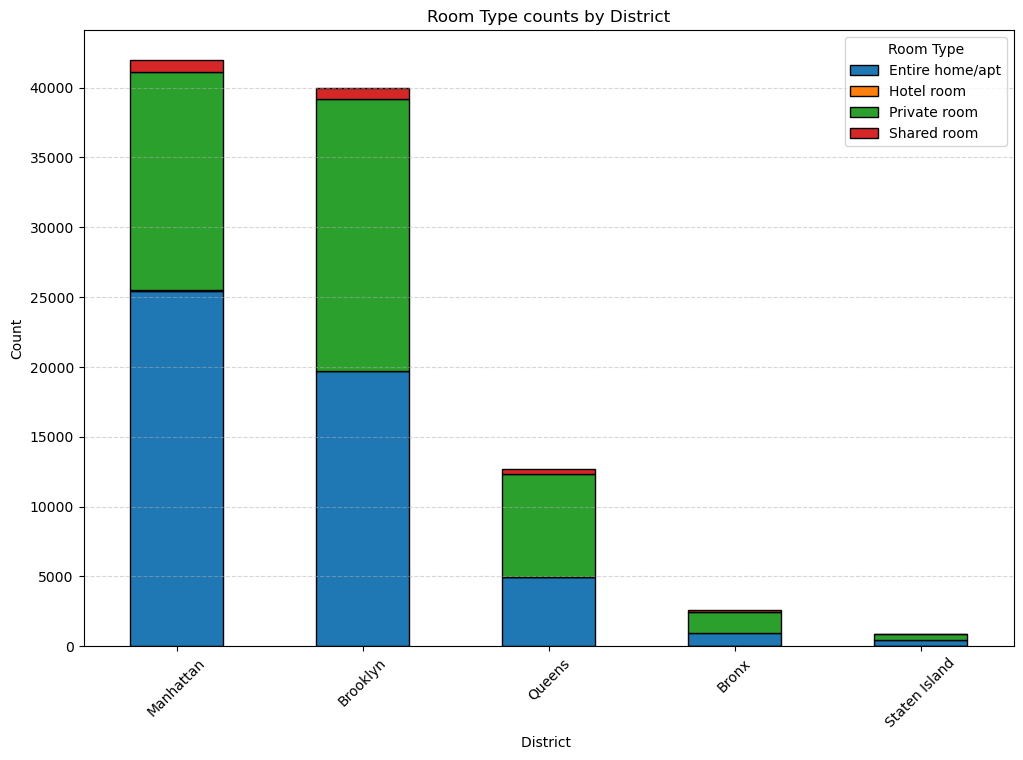

In [18]:
room_counts_by_district = bnb.groupby(['district', 'room type']).size().unstack(fill_value=0)

room_counts_by_district['Total'] = room_counts_by_district.sum(axis=1)

districts = room_counts_by_district.sort_values(by='Total', ascending=False)

districts.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(12,8), edgecolor='black')

plt.xlabel('District ')
plt.ylabel('Count')
plt.title('Room Type counts by District')
plt.legend(title='Room Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

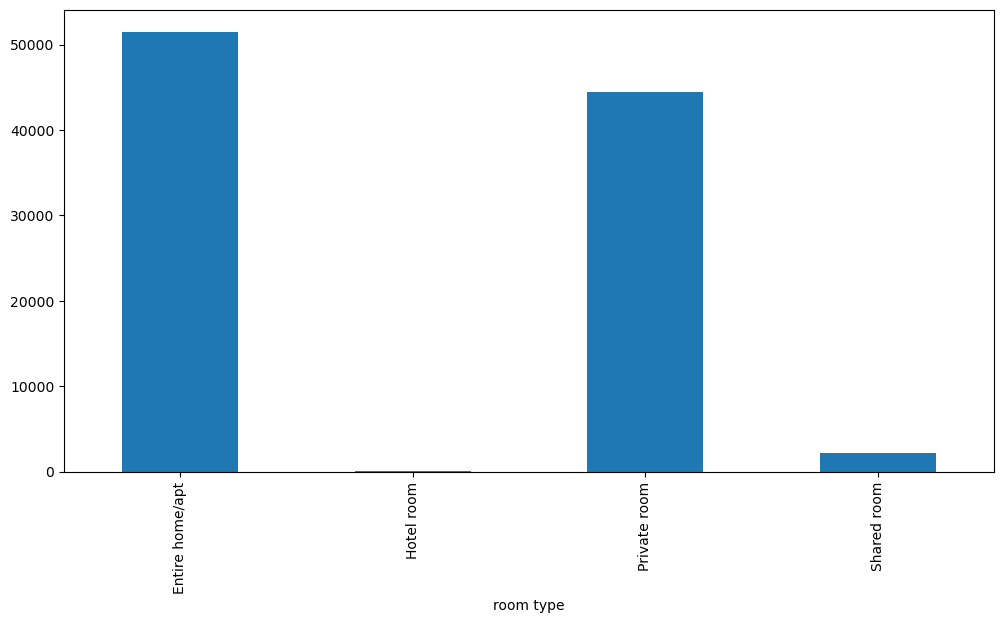

In [20]:
pog = bnb.groupby('room type')['price'].count()
pog.mean()
plt.figure(figsize=(12,6))
pog.plot(kind='bar')
plt.show()

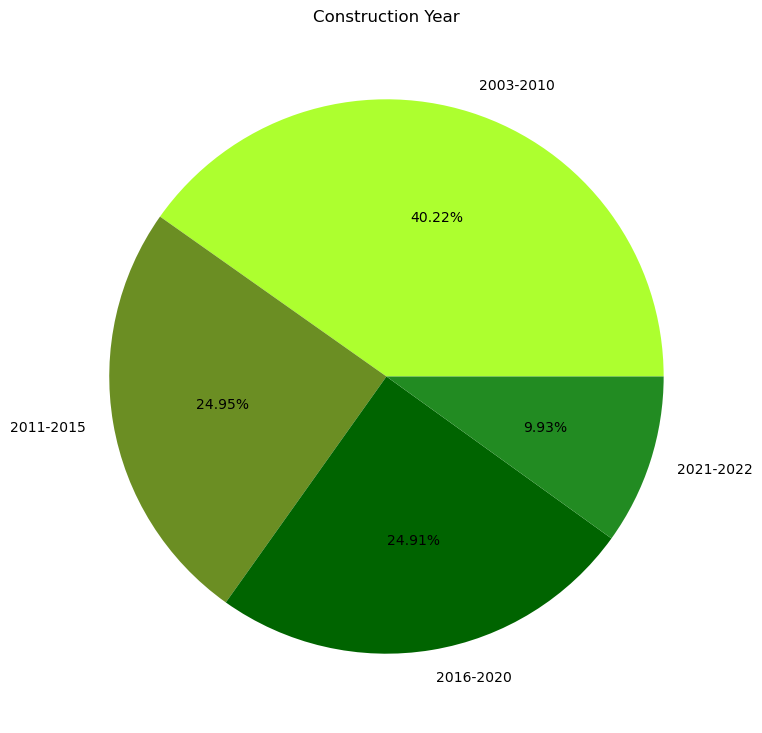

In [13]:
first = bnb[(bnb['Construction year'] >= 2003) & (bnb['Construction year'] <= 2010)]['Construction year'].count()
second = bnb[(bnb['Construction year'] >= 2011) & (bnb['Construction year'] <= 2015)]['Construction year'].count()
third = bnb[(bnb['Construction year'] >= 2016) & (bnb['Construction year'] <= 2020)]['Construction year'].count()
fourth = bnb[(bnb['Construction year'] >= 2021) & (bnb['Construction year'] <= 2022)]['Construction year'].count()


# Create a list of counts
CY = [first, second, third, fourth]
labels = ['2003-2010', '2011-2015', '2016-2020', '2021-2022']
colors = ['#ADFF2F', '#6B8E23', '#006400', '#228B22']
plt.figure(figsize=(16, 9)) 
plt.pie(CY, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Construction Year')
plt.show()

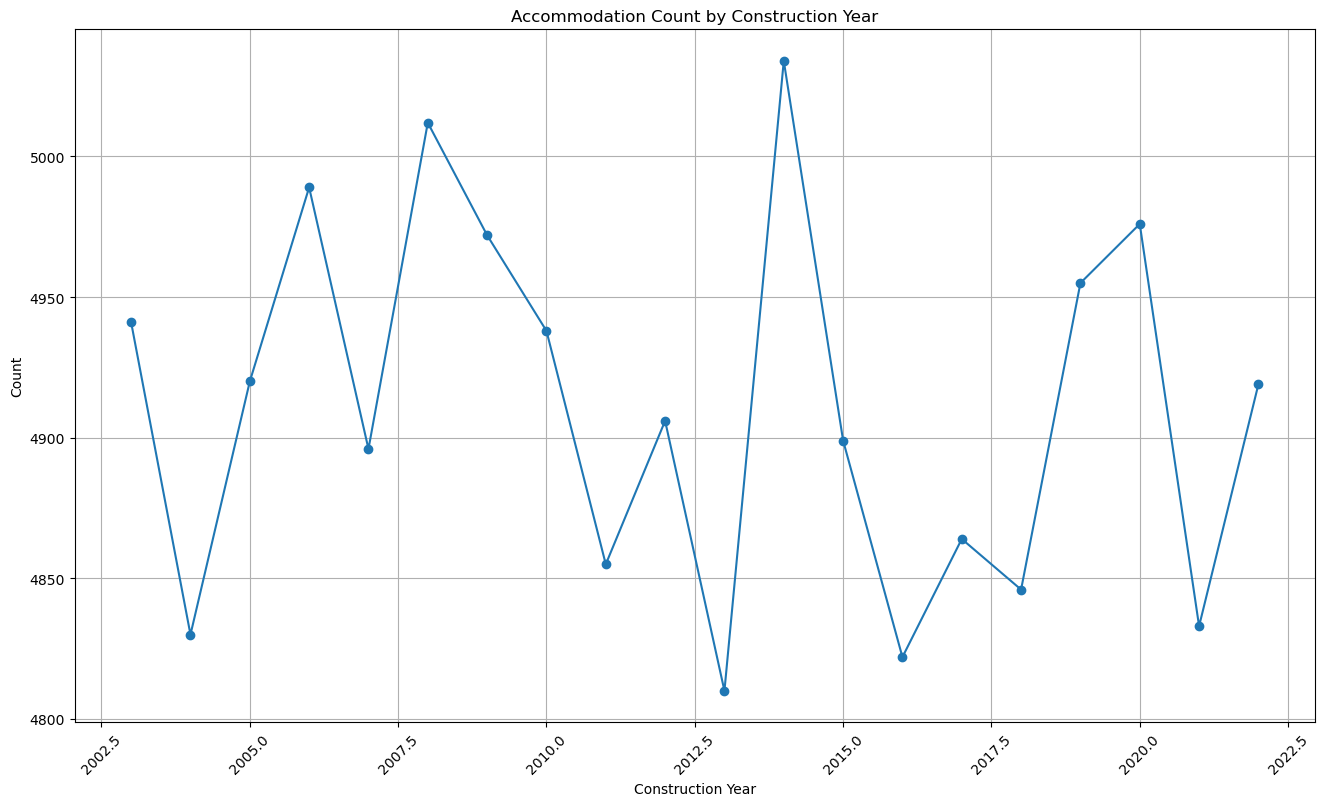

In [9]:
construction_year_count = bnb.groupby('Construction year')['price'].count()

plt.figure(figsize=(16, 9))
construction_year_count.plot(kind='line', marker='o')
plt.title('Accommodation Count by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

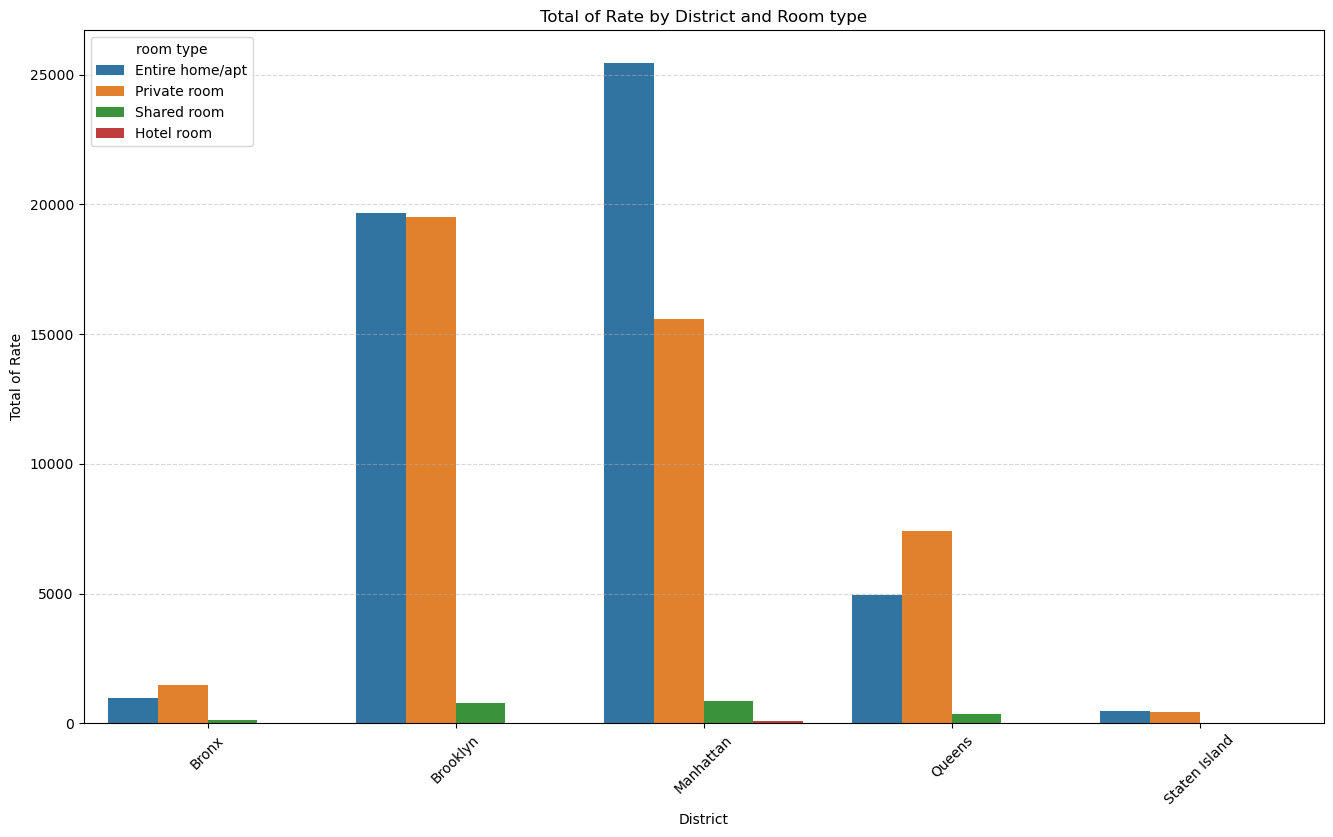

In [10]:
district_room_rate = bnb.groupby(['district','room type'])['rate'].count().reset_index()
plt.figure(figsize=(16, 9)) 
sns.barplot(x="district", y="rate", hue="room type", data=district_room_rate)

plt.xlabel("District")
plt.ylabel("Total of Rate")
plt.title("Total of Rate by District and Room type")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

plt.show()

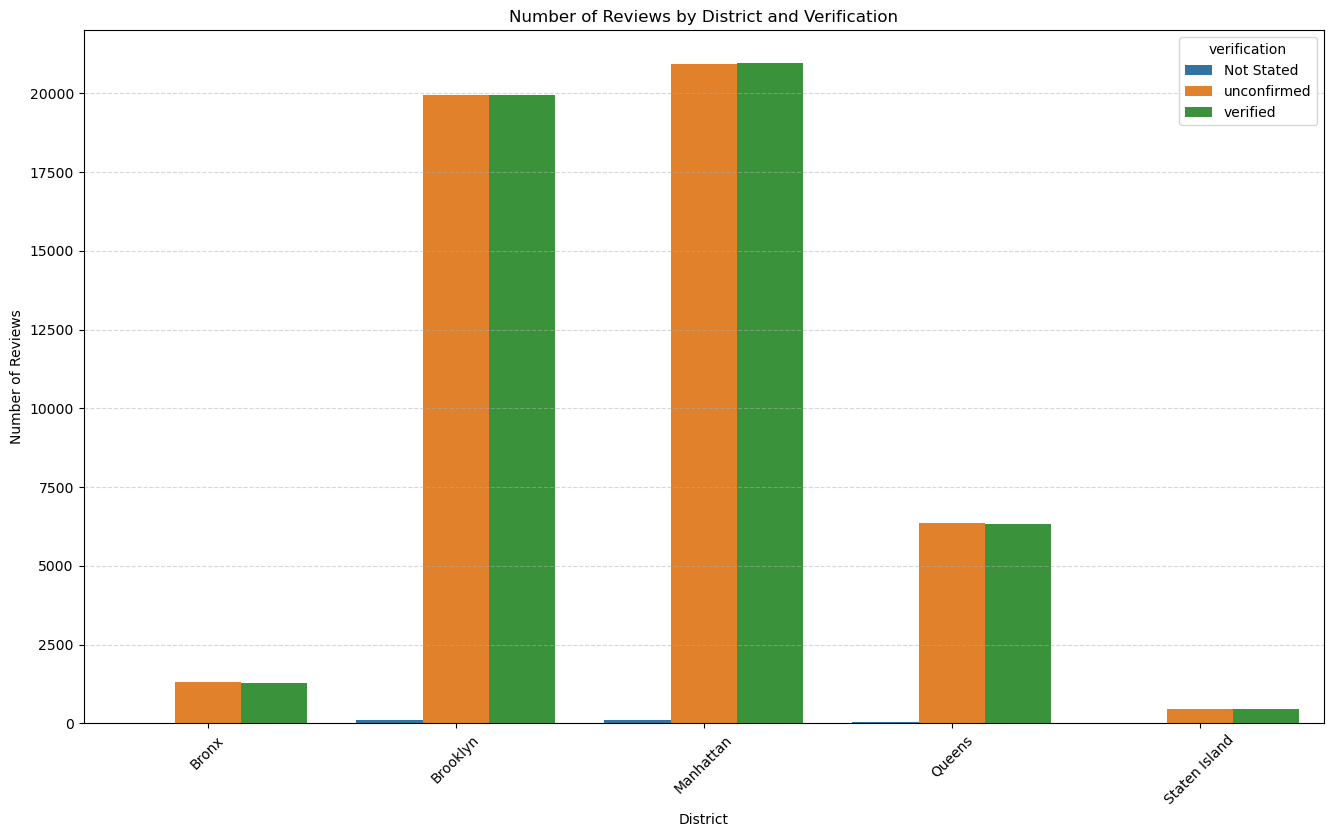

In [11]:
districts_ver_nor=bnb.groupby(['district','verification'])['number of reviews'].count().reset_index()
districts_ver_nor

plt.figure(figsize=(16, 9)) 
sns.barplot(x="district", y="number of reviews", hue="verification", data=districts_ver_nor)

plt.xlabel("District")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews by District and Verification")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

plt.show()

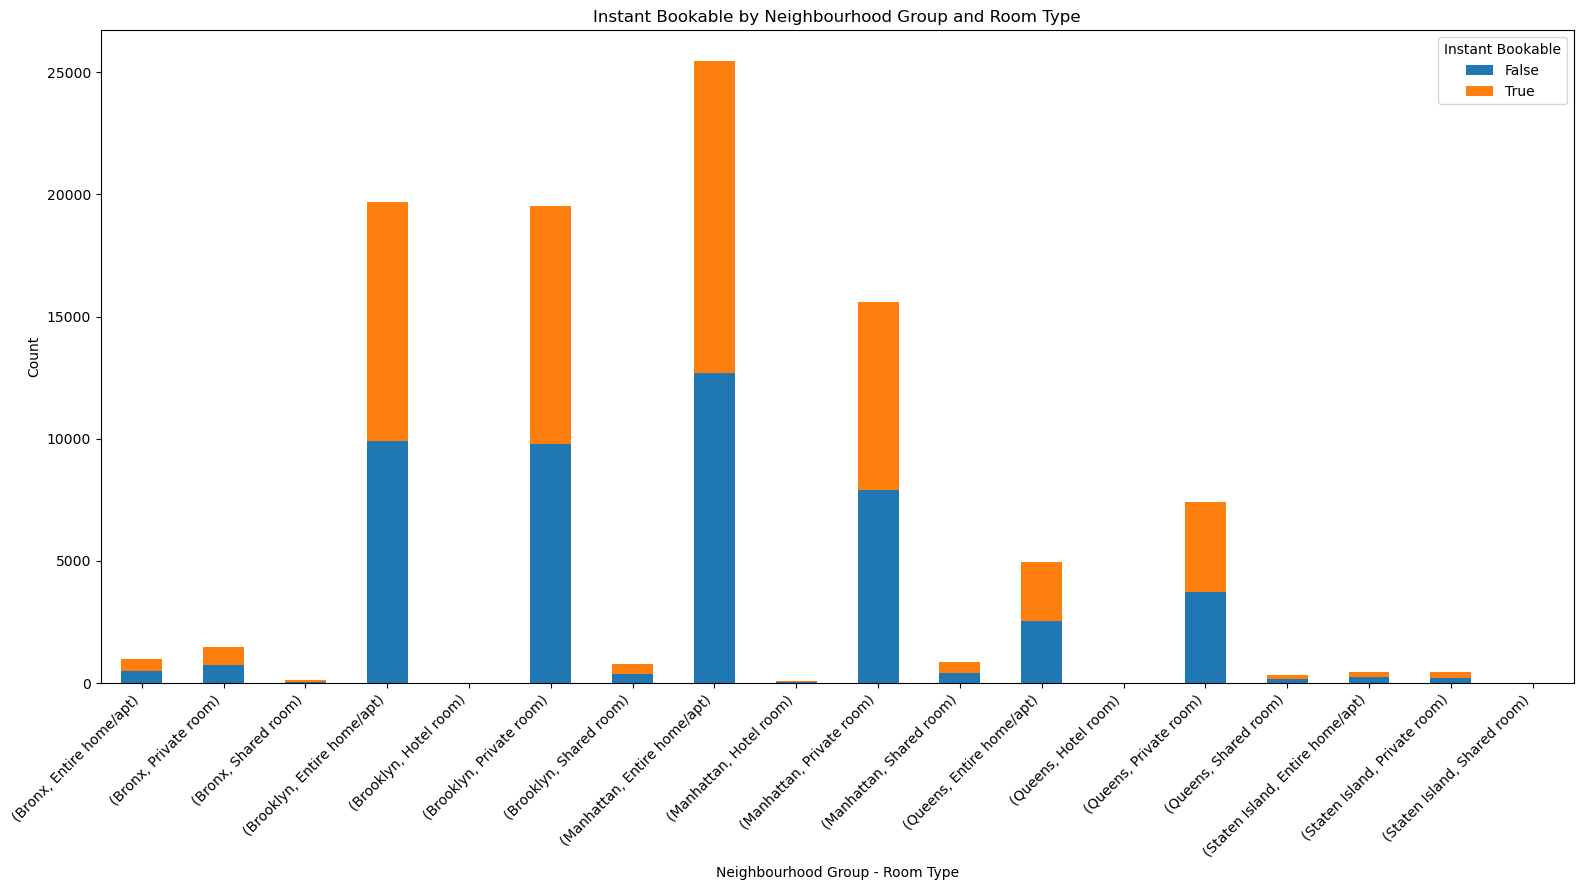

In [12]:
instant = bnb.groupby(['district', 'room type', 'bookable'])['bookable'].count()
instantDF = pd.DataFrame(instant)
instantDF.columns = ['count']

instant_pivot = instantDF.pivot_table(index=['district', 'room type'], columns='bookable', values='count', fill_value=0)

ax = instant_pivot.plot(kind='bar', stacked=True, figsize=(16, 9))
plt.title('Instant Bookable by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group - Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Instant Bookable')
plt.tight_layout()
plt.show()